<a href="https://colab.research.google.com/github/machave11/Hotel-Booking-Analysis/blob/main/Nikhil_Machave%7CCopy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing important libraries for the EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone-Project EDA/Copy of Hotel Bookings.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.columns

In [23]:
# checking the summary of statitics 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119237.00
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,inf
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,-3.19
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,37.40
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,49.50
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,66.00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,inf


Looking Some NaN values or Outliers

In [ ]:
# checking if our data contain some missing order
df.isna().sum().sort_values(ascending=False)

In [ ]:
# Dropping comapny column becoz it having too many missing values
df.drop(columns=['company'], axis=1, inplace=True)

In Children column we have 4 missing values, so we are filling those missing values with average value of children column and we are type-casting float values to integer value.

In [ ]:
# Replace All missing value with rounded mean value
df['children'].fillna(round(df['children'].mean()), inplace=True)
df['children']= df['children'].apply(lambda x : int(x))

In Agent we have 16340 missing values, so we replacing those value with unknown

In [ ]:
df['agent'].fillna(0,inplace=True)
df['agent'] = df['agent'].apply(lambda x : int(x))
df['agent'] = df['agent'].apply(lambda x : 'unknown' if x==0 else x)

In [ ]:
# Dropping the rows where sum of adults, childrens, babies is equals to 0
df = df.drop(df[(df['adults']+df['children']+df['babies'])==0].index) #dropping the rows where the sum of adult,children and babies is 0.

Checking for ouliers in daily avarage rate

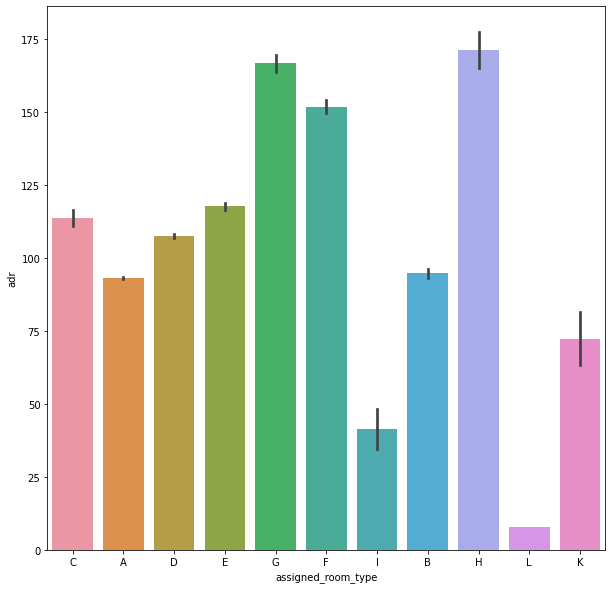

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(y=df['adr'], x=df['assigned_room_type'])

# Removing outliers data from dataset where adr is greater than 1000

In [ ]:
#dropping dataset where adr is greater than 1000
df= df.drop(df[df['adr']>1000].index)
# dropping data where adr is leaa than zero
df = df.drop(df[df['adr']<0].index)

Things we have to still now
1. checking the head and tail of dataset
2.checking summary and statistics of dataset
3.checking some NaN values or Outliers
4.filled missing data and Analyse outliers and removed outliers

# Now lets try to finds out solution of below questions:



 1.What is the percentage of booking done in different hotels?
 2.How many total bookings done in different Years?
 3.How many total bookings done in different months?
 4.Total Number of Booking Cancelled in different months?
 5.Total Number of Non-Cancelled Bookings in different months?

# 1.Plot the type of hotel anf there booking

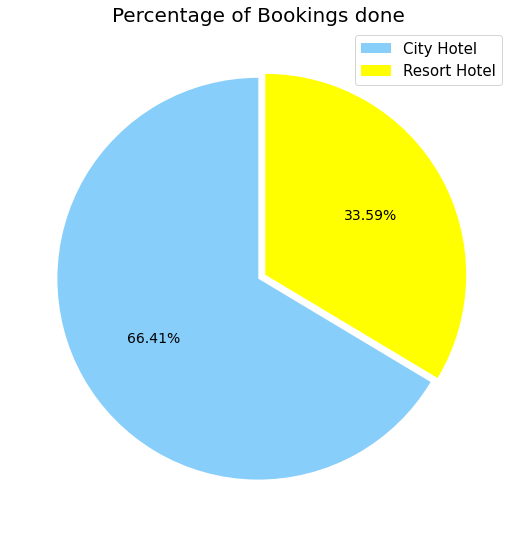

In [ ]:
#Pie-Chart for the percentage of bookings done in different types of Hotels.
plt.figure(figsize=(9,10))
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.04)
colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of Bookings done', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 15})


Conclusion = 66.45% of hotel booking done in City hotel
             33.55% hotel booking done in Resort hotel

# 2.Plot yearwise hotel Booking

Text(0, 0.5, 'Number of Bookings')

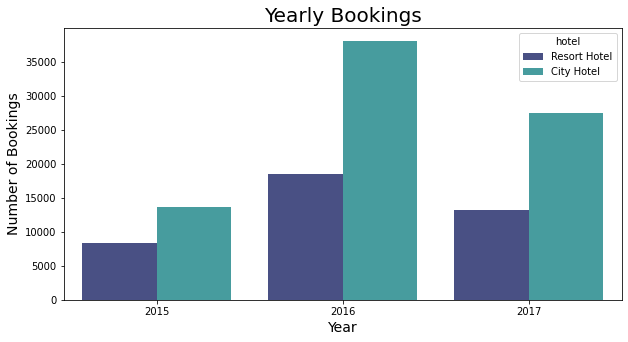

In [ ]:
#Countplot for Number of bookings done in 2015, 2016 and 2017 in different type of hotels
plt.figure(figsize=(10,5))
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel', palette='mako').set_title ('Yearly Bookings', fontsize = 20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)


Conclusion = We see that, In year 2016 most of the booking have been made in City Hotel and Resort hotel

# Plot of Monthwise hotel booking

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(x=df['arrival_date_month'], hue=df['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='crest').set_title ('Monthly Bookings',fontsize=20)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(prop={'size':15})

Conclusion = In above we see that, Most of booking in Month of August in City Hotel, Resort Hotel

# Plot of monthly canceled

In [ ]:
#Countplot of Total number of booking Cancelled month wise 
df1=df[df['is_canceled']==1]
plt.figure(figsize = (15, 10))
sns.countplot(x=df1['arrival_date_month'], hue=df1['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='YlGn').set_title ('Total Monthly Booking Cancelled',fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Booking Cancelled',fontsize=14)
plt.legend(prop={'size':14})

Conclusion = In May, Most of booking cancel in City Hotel and Resort Hotel

# Plot total Non-cancel booking

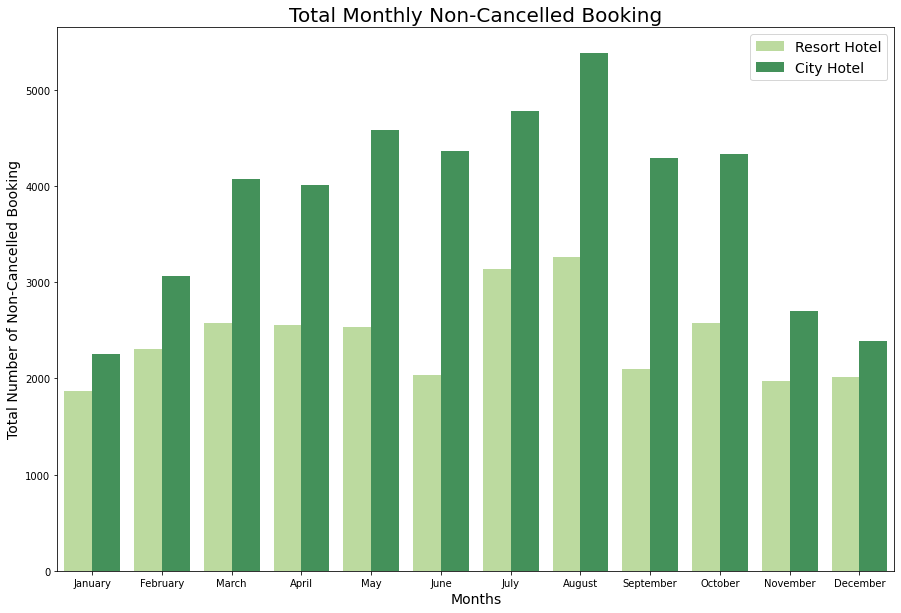

In [24]:
#Countplot for Monthly Non-Cancelled Booking
df2=df[df['is_canceled']==0]
plt.figure(figsize = (15, 10))
sns.countplot(x=df2['arrival_date_month'], hue=df2['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='YlGn').set_title ('Total Monthly Non-Cancelled Booking',fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Non-Cancelled Booking',fontsize=14)
plt.legend(prop={'size':14})

# Customer stays in weekdays

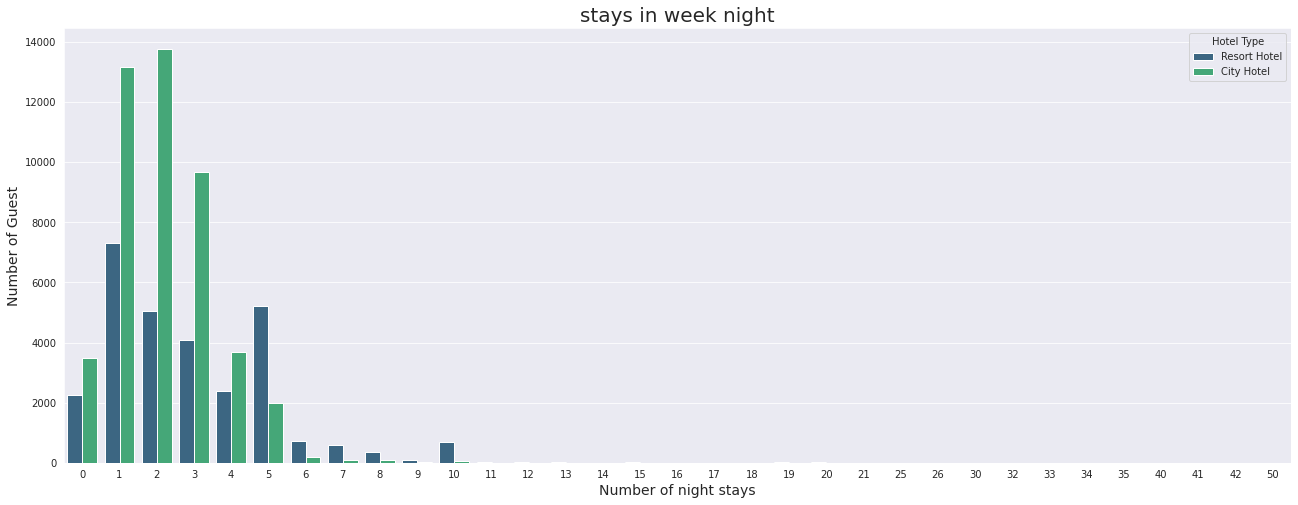

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(22,8))
sns.countplot(data = df2, x = 'stays_in_week_nights', hue='hotel', palette="viridis").set_title('stays in week night', fontsize =20)
plt.xlabel("Number of night stays", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)
plt.legend(title = "Hotel Type",loc = 1,)

Conclusion = Most of the customer stays 2 day in city hotel and 1 day in Resort Hotel

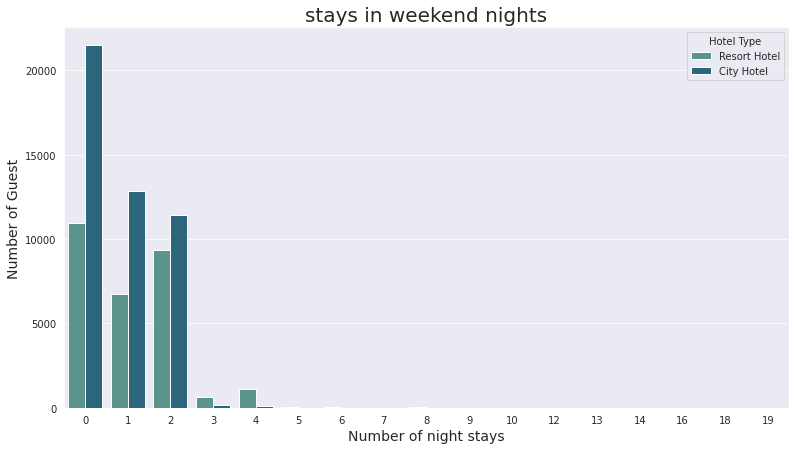

In [ ]:
#Countplot for customer stays in weekend
sns.set_style('darkgrid')
plt.figure(figsize=(13,7))
sns.countplot(data = df2, x = 'stays_in_weekend_nights', hue='hotel', palette="crest").set_title('stays in weekend nights', fontsize =20)
plt.xlabel("Number of night stays", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)
plt.legend(title = "Hotel Type",loc = 1)

Conclusion = Most of customer stays 0 nights in City And Resort Hotel

# Prefered Meal Type


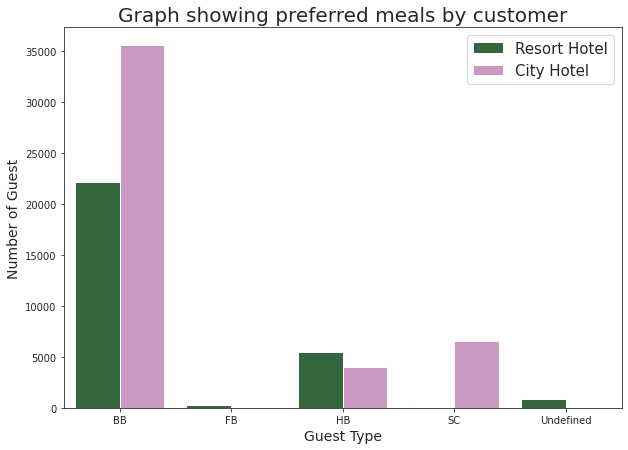

In [ ]:
#Countplot for meal type.
sns.set_style('ticks')
plt.figure(figsize=(10,7))
sns.countplot(data = df2, x = 'meal', hue='hotel', palette="cubehelix").set_title('Graph showing preferred meals by customer', fontsize =20)
plt.xlabel("Guest Type", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)
plt.legend(loc=1, prop={'size':15})

Conclusion = Most prefered meal by customer is BB for City and Resort hotel

# Special Request Of Customers

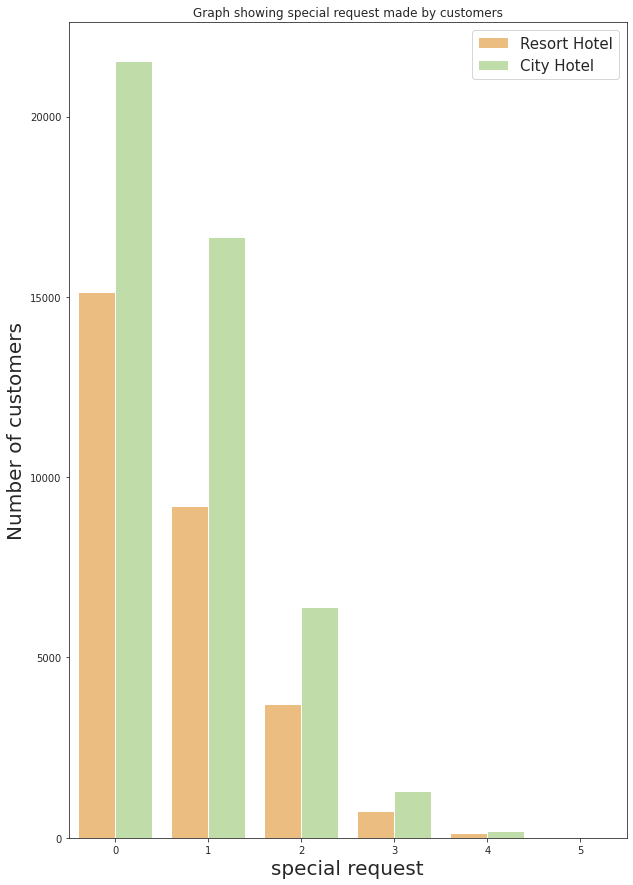

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(10,15))
sns.countplot(data = df2, x = 'total_of_special_requests', hue='hotel', palette="Spectral").set_title('Graph showing special request made by customers')
plt.xlabel('special request', fontsize =20)
plt.ylabel('Number of customers', fontsize =20)
plt.legend(loc=1, prop={'size': 15})

Conclusion = Most of customers do not make any special request

# Most Preferred Room type

Text(0, 0.5, 'Number of Booking')

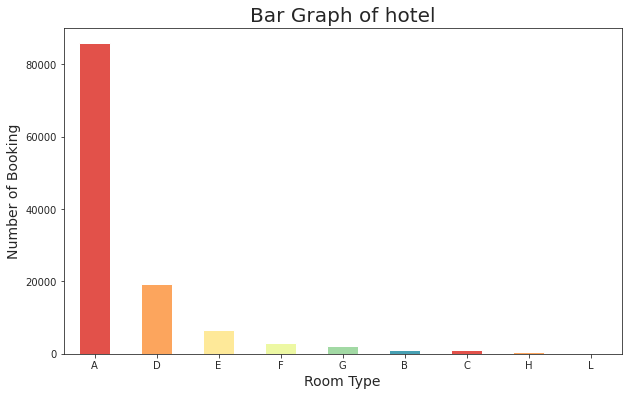

In [ ]:
#Bar plot for number of customers and Room type
room_type = df['reserved_room_type'].value_counts()
plt.figure(figsize=(10, 6))
ax = room_type.plot(kind='bar', rot=0, color=sns.color_palette('Spectral'))
ax.set_title("Bar Graph of hotel", y = 1, fontsize=20)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Number of Booking', fontsize=14)

Conclusion = Most Preferred roomtype is A

11. what are the top 20 countries where from we are getting more customer
12. what deposit type most customer choose
13. From which market segment we are getting more number of booking cancellation
14. From which market segment we are getting more customer who are not cancelling there booking
15. which agent(id) booking most numbers of hotels

# What are the top 20 countries where from we are getting more customers

Text(0, 0.5, 'Number of Customers')

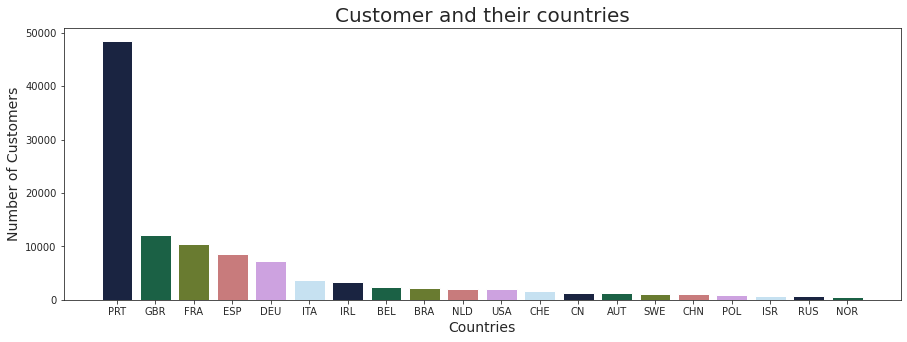

In [ ]:
#barplot of customer and their origin countries
country = dict(df['country'].value_counts())
plt.figure(figsize=(15,5))
plt.bar((list(country.keys()))[:20],(list(country.values()))[:20] ,width=0.8, color=sns.color_palette('cubehelix'))
plt.title('Customer and their countries',fontsize = 20)
plt.xlabel('Countries' ,fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)

Conclusion = Most number of customers are from PRT

12. Deposit Type


Text(0, 0.5, 'Number of customer')

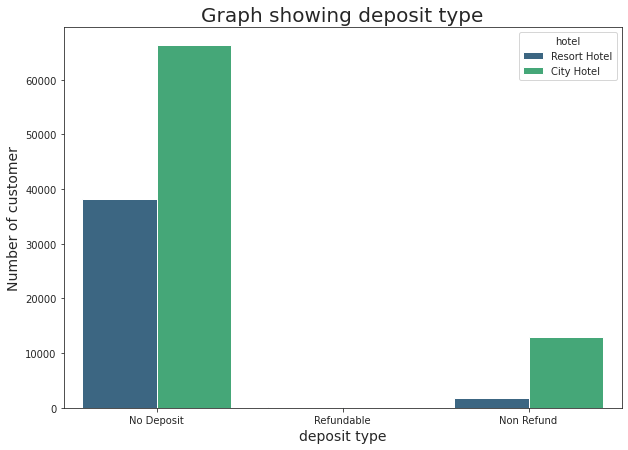

In [ ]:
#Countplot for deposit
sns.set_style('ticks')
plt.figure(figsize=(10,7))
ax=sns.countplot(x = 'deposit_type', data=df, hue='hotel', palette='viridis').set_title('Graph showing deposit type', fontsize =20)
plt.xlabel('deposit type', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)

Conclusion = Most of customer prefer No deposit for booking

# Market segment we are getting more number of booking cancellation

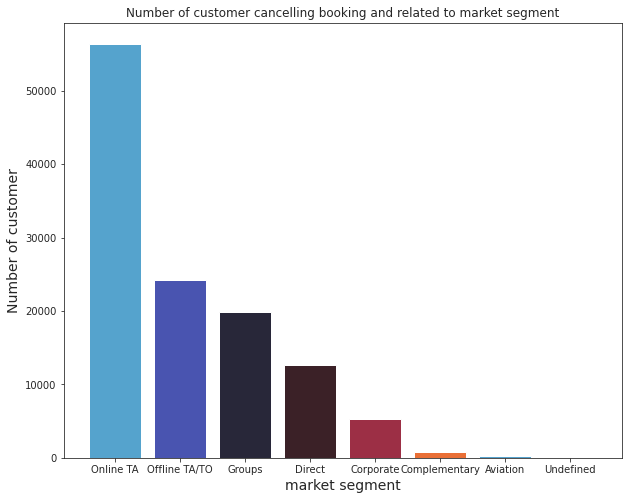

In [ ]:
count = dict(df['market_segment'].value_counts())
aa = list(count.keys())
bb = list(count.values())
plt.figure(figsize=(10,8))
plt.bar(aa, bb, width=0.8, color=sns.color_palette('icefire'))
plt.title('Number of customer cancelling booking and related to market segment')
plt.xlabel('market segment', fontsize =14)
plt.ylabel('Number of customer', fontsize =14)
plt.show()

Conclusion = From Online TA , Most customer cancel there Booking

# Not cancelling booking from Market Segment

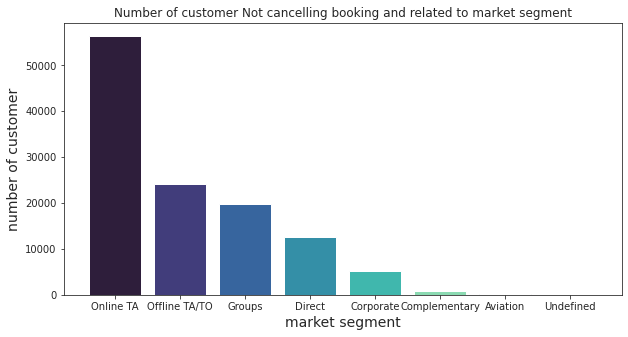

In [ ]:
count = dict(df['market_segment'].value_counts())
plt.figure(figsize=(10,5))
aa = list(count.keys())
bb = list(count.values())
plt.bar(aa, bb, width=0.8, color=sns.color_palette('mako'))
plt.title('Number of customer Not cancelling booking and related to market segment')
plt.xlabel('market segment', fontsize=14)
plt.ylabel('number of customer', fontsize=14)
plt.show()

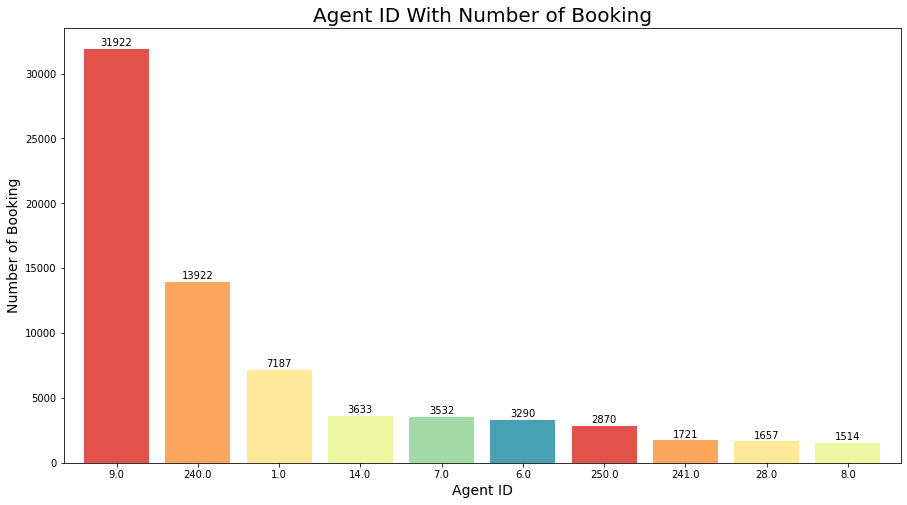

In [ ]:
#barplot for agents and their bookings
agent = df['agent'].value_counts().head(10)
plt.figure(figsize=(15,8))
ax = agent.plot(kind = 'bar', rot=0, color=sns.color_palette('Spectral'), width=0.8)
ax.set_title('Agent ID With Number of Booking', y=1, fontsize=20)
ax.set_xlabel('Agent ID', fontsize=14)
ax.set_ylabel('Number of Booking', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()
   


Conclusion = Agent Wth ID 9, Book Most number of hotels

16. In which room type have high avrage price
17. In which month most revenue are generated
18. What is optimal length to stay
19. How Many repeated guest we have
20. the Correlation between features

# In which room type have high avarage price

Text(0, 0.5, 'Average Price')

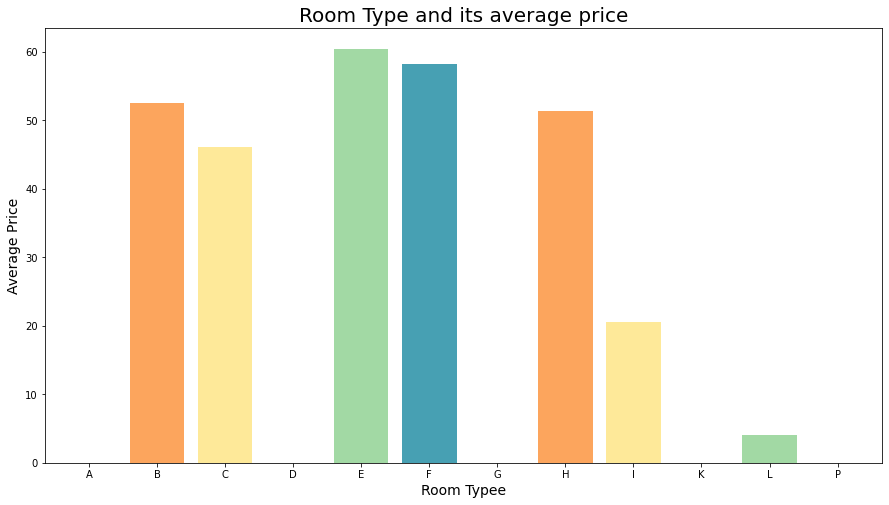

In [14]:
#barplot for Room type and their average price
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']+ df['babies'])
a=df.groupby('assigned_room_type')['adr_pp'].mean()
plt.figure(figsize=(15,8))
ax = a.plot(kind='bar', rot=0, color=sns.color_palette('Spectral'), width=0.8)
ax.set_title("Room Type and its average price", y = 1, fontsize = 20)
ax.set_xlabel('Room Typee', fontsize = 14)
ax.set_ylabel('Average Price', fontsize = 14)

Conclusion = Room E have high avarage price and room L is minimum avarage price

# 17. Revenue per month per hotel

Text(0, 0.5, 'Total Revenue')

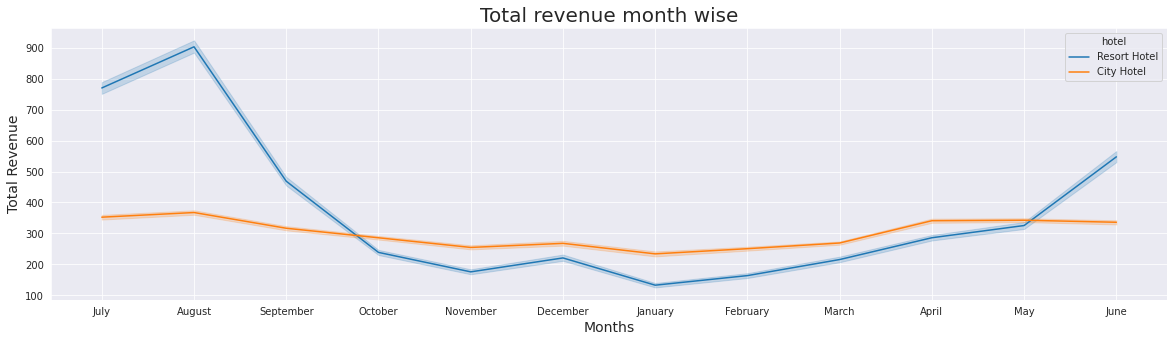

In [29]:
#lineplot for Revenue per hotel month-wise
plt.figure(figsize=(20,5))
df2['price'] = df2['adr'] * (df2['stays_in_weekend_nights'] + df2['stays_in_week_nights'])
sns.lineplot(data = df2, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.title('Total revenue month wise', fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Revenue',fontsize=14)

Conclusion = The revenue of resort hotel is maximum in august and lowest in january and Their is no high fluctuation in city hotel throughout year

# 18. Plotting scatter plot to find optimal length of stay

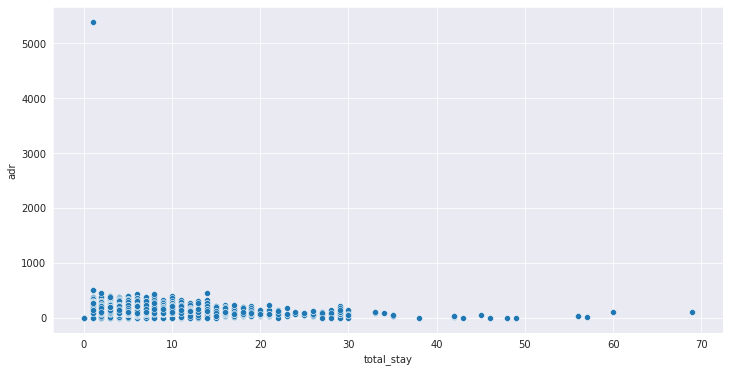

In [35]:
#scatterplot for optimal stay length
df['total_stay']=df['stays_in_week_nights']+df['stays_in_weekend_nights']
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

Conclusion = The longer the stay length, the best price customer will get

# 19 Number of repeated guests

In [36]:
df2['is_repeated_guest'] = df2['is_repeated_guest'].apply(lambda x : 'New Guest' if x==0 else 'Repeated Guest')

Text(0, 0.5, 'Number of Guest')

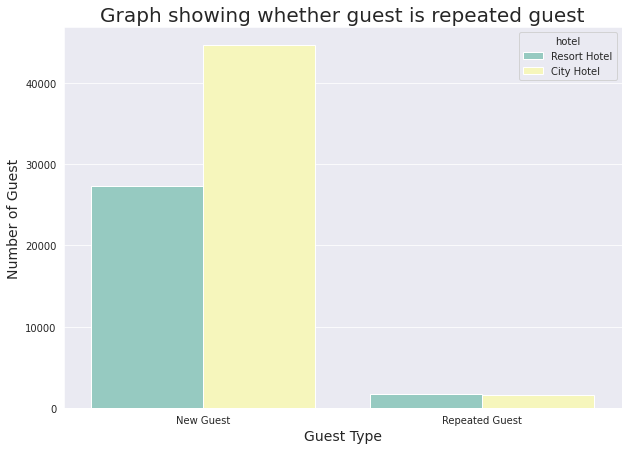

In [40]:
#countplot for guests [Repeated or New]
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.countplot(data = df2, x = 'is_repeated_guest', hue='hotel', palette="Set3").set_title('Graph showing whether guest is repeated guest', fontsize =20)
plt.xlabel("Guest Type", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)


Conclusion = We have number of new guest in both typle of hotels

# Correlation - 

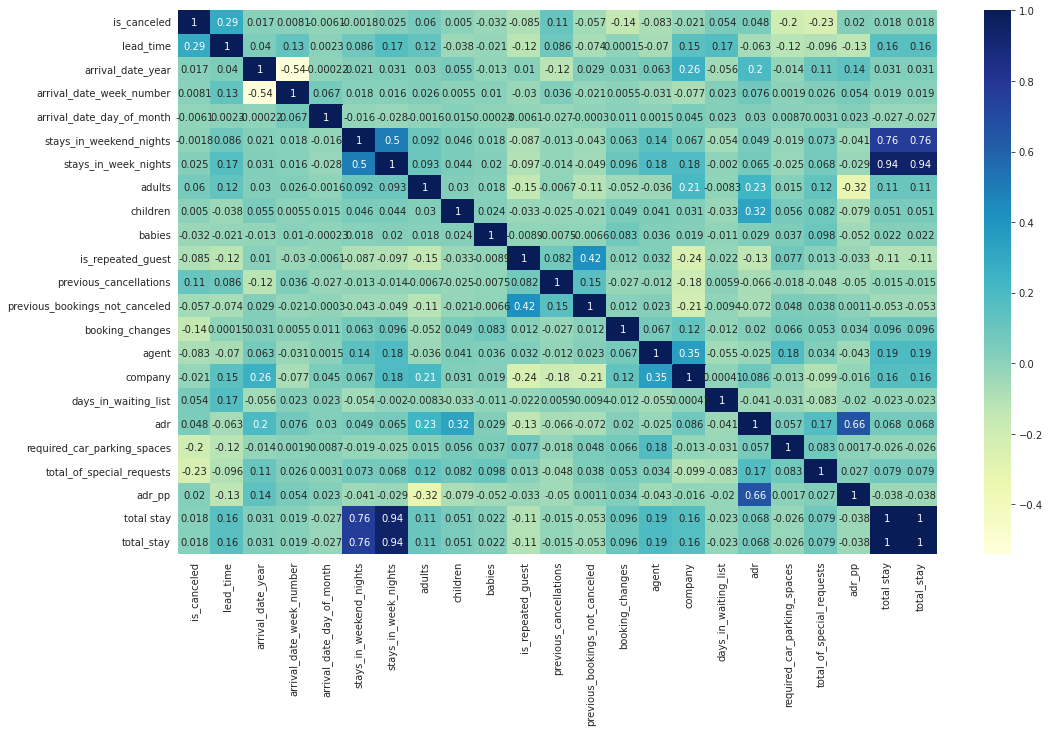

In [44]:
#Correlation
correlation = df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(correlation, annot=True ,cmap="YlGnBu")